## DEEP LEARNING CNN FOR FASHION MNIST DATASET
---
* Using PyTorch
* Reimplementation of : SOURCE{https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/}

In [1]:
import os
import sys

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

from models import BaselineCNN, LeNet5, ResNetMini, DenseNetTiny, MobileNetLite, ViTTiny
from utils import train_eval_report
from utils import visualise_fashion_mnist
from utils.globals import BATCH_SIZE, LEARNING_RATE
from utils.globals import device, early_stopper, loss_fn

In [3]:
# import dataset - fashion MNIST

# Specify transforms
transform = transforms.Compose([
    # transforms.Resize(256),         # Up scale image to 256 x 256  NOTE WAY TOO COMPUTATIONALLY INTENSIVE
    transforms.ToTensor()           # Convert from image.PIL to tensors
])
# NOTE Images are left as 1 channel grayscale images for now!

download = not os.path.exists('./data/FashionMNIST')
train_dataset = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=download, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=download, transform=transform)

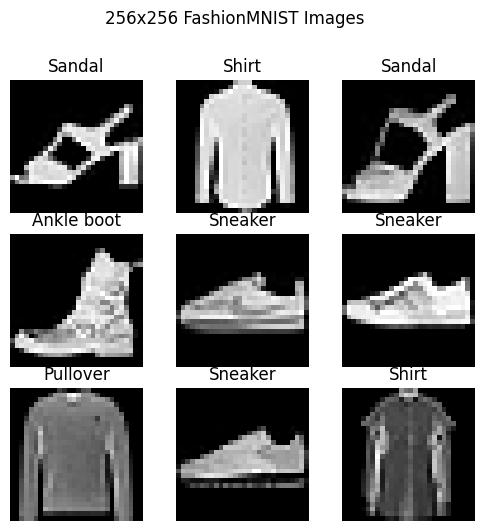

In [9]:
# test sample
visualise_fashion_mnist(train_dataset)

In [10]:
# Setting up data loaders
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

# Check that the dataloader works
images, labels = next(iter(train_dataloader))
sample_image, sample_label = images[0], labels[1]
sample_image.shape, sample_label

(torch.Size([1, 28, 28]), tensor(9))

In [13]:
# baseline_cnn = BaselineCNN()
# optimizer = torch.optim.Adam(params=baseline_cnn.parameters(), lr=LEARNING_RATE)

# report_baseline = train_eval_report(
#     model=baseline_cnn,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=early_stopper,
#     device=device,
# )

# Epoch   1  Train Loss: 0.544762, Train Acc: 0.8082.  Test Loss:  0.374715,  Test Acc:  0.8630.
# Epoch   2  Train Loss: 0.390180, Train Acc: 0.8576.  Test Loss:  0.338141,  Test Acc:  0.8772.
# Epoch   3  Train Loss: 0.355473, Train Acc: 0.8711.  Test Loss:  0.323343,  Test Acc:  0.8853.
# Epoch   4  Train Loss: 0.334749, Train Acc: 0.8782.  Test Loss:  0.332174,  Test Acc:  0.8780.
# Epoch   5  Train Loss: 0.321911, Train Acc: 0.8841.  Test Loss:  0.319051,  Test Acc:  0.8779.
# Epoch   6  Train Loss: 0.311050, Train Acc: 0.8871.  Test Loss:  0.303519,  Test Acc:  0.8887.
# Epoch   7  Train Loss: 0.304898, Train Acc: 0.8885.  Test Loss:  0.292278,  Test Acc:  0.8937.
# Epoch   8  Train Loss: 0.296578, Train Acc: 0.8924.  Test Loss:  0.296871,  Test Acc:  0.8904.
# Epoch   9  Train Loss: 0.291616, Train Acc: 0.8944.  Test Loss:  0.289885,  Test Acc:  0.8939.
# Epoch  10  Train Loss: 0.287122, Train Acc: 0.8957.  Test Loss:  0.286768,  Test Acc:  0.8969.
# Epoch  11  Train Loss: 0.283137, Train Acc: 0.8974.  Test Loss:  0.298220,  Test Acc:  0.8928.
# Epoch  12  Train Loss: 0.276670, Train Acc: 0.8993.  Test Loss:  0.289816,  Test Acc:  0.8959.
# Epoch  13  Train Loss: 0.275968, Train Acc: 0.8995.  Test Loss:  0.278961,  Test Acc:  0.9004.
# Epoch  14  Train Loss: 0.273080, Train Acc: 0.9008.  Test Loss:  0.282279,  Test Acc:  0.8973.
# Epoch  15  Train Loss: 0.269305, Train Acc: 0.9011.  Test Loss:  0.291223,  Test Acc:  0.8924.
# Epoch  16  Train Loss: 0.265753, Train Acc: 0.9047.  Test Loss:  0.284951,  Test Acc:  0.9004.
# Epoch  17  Train Loss: 0.261648, Train Acc: 0.9053.  Test Loss:  0.300275,  Test Acc:  0.8922.
# Epoch  18  Train Loss: 0.261609, Train Acc: 0.9042.  Test Loss:  0.281440,  Test Acc:  0.8972.
# Early Stopping at epoch 18. Patience=5

In [14]:
# report_baseline

In [ ]:
# lenet5 = LeNet5()
# optimizer = torch.optim.Adam(params=lenet5.parameters(), lr=LEARNING_RATE)

# report_lenet5 = train_eval_report(
#     model=lenet5,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=early_stopper,
#     device=device,
# )

# Epoch   1  Train Loss: 0.507433, Train Acc: 0.8129.  Test Loss:  0.412366,  Test Acc:  0.8514.
# Epoch   2  Train Loss: 0.374882, Train Acc: 0.8634.  Test Loss:  0.395705,  Test Acc:  0.8569.
# Epoch   3  Train Loss: 0.341705, Train Acc: 0.8738.  Test Loss:  0.376818,  Test Acc:  0.8640.
# Epoch   4  Train Loss: 0.317797, Train Acc: 0.8827.  Test Loss:  0.344701,  Test Acc:  0.8775.
# Epoch   5  Train Loss: 0.299856, Train Acc: 0.8892.  Test Loss:  0.345808,  Test Acc:  0.8769.
# Epoch   6  Train Loss: 0.288882, Train Acc: 0.8933.  Test Loss:  0.339503,  Test Acc:  0.8748.
# Epoch   7  Train Loss: 0.277294, Train Acc: 0.8968.  Test Loss:  0.338389,  Test Acc:  0.8790.
# Epoch   8  Train Loss: 0.269279, Train Acc: 0.9006.  Test Loss:  0.334124,  Test Acc:  0.8807.
# Epoch   9  Train Loss: 0.259907, Train Acc: 0.9034.  Test Loss:  0.343709,  Test Acc:  0.8755.
# Epoch  10  Train Loss: 0.253162, Train Acc: 0.9058.  Test Loss:  0.332761,  Test Acc:  0.8835.
# Epoch  11  Train Loss: 0.244909, Train Acc: 0.9083.  Test Loss:  0.330115,  Test Acc:  0.8803.
# Epoch  12  Train Loss: 0.237442, Train Acc: 0.9113.  Test Loss:  0.330004,  Test Acc:  0.8830.
# Epoch  13  Train Loss: 0.231809, Train Acc: 0.9141.  Test Loss:  0.320691,  Test Acc:  0.8877.
# Epoch  14  Train Loss: 0.225432, Train Acc: 0.9153.  Test Loss:  0.324474,  Test Acc:  0.8899.
# Epoch  15  Train Loss: 0.222474, Train Acc: 0.9176.  Test Loss:  0.332560,  Test Acc:  0.8797.
# Epoch  16  Train Loss: 0.216257, Train Acc: 0.9191.  Test Loss:  0.320320,  Test Acc:  0.8907.
# Epoch  17  Train Loss: 0.210293, Train Acc: 0.9212.  Test Loss:  0.338766,  Test Acc:  0.8838.
# Epoch  18  Train Loss: 0.206045, Train Acc: 0.9226.  Test Loss:  0.328290,  Test Acc:  0.8897.
# Epoch  19  Train Loss: 0.200888, Train Acc: 0.9263.  Test Loss:  0.339442,  Test Acc:  0.8896.
# Epoch  20  Train Loss: 0.198947, Train Acc: 0.9254.  Test Loss:  0.328405,  Test Acc:  0.8864.
# Epoch  21  Train Loss: 0.193141, Train Acc: 0.9274.  Test Loss:  0.335704,  Test Acc:  0.8879.
# Early Stopping at epoch 21. Patience=5

In [17]:
# report_lenet5

In [ ]:
# resnet_mini = ResNetMini(base_channels=4)  # Drastically lowered for computational efficiency while developing
# optimizer = torch.optim.Adam(params=resnet_mini.parameters(), lr=LEARNING_RATE)

# report_resnet = train_eval_report(
#     model=resnet_mini,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=early_stopper,
#     device=device,
# )

# Epoch   1  Train Loss: 0.790990, Train Acc: 0.7126.  Test Loss:  0.464289,  Test Acc:  0.8234.
# Epoch   2  Train Loss: 0.559418, Train Acc: 0.8015.  Test Loss:  0.441719,  Test Acc:  0.8352.
# Epoch   3  Train Loss: 0.496140, Train Acc: 0.8241.  Test Loss:  0.423330,  Test Acc:  0.8324.
# Epoch   4  Train Loss: 0.460139, Train Acc: 0.8348.  Test Loss:  0.361538,  Test Acc:  0.8645.
# Epoch   5  Train Loss: 0.438259, Train Acc: 0.8416.  Test Loss:  0.386560,  Test Acc:  0.8540.
# Epoch   6  Train Loss: 0.420525, Train Acc: 0.8496.  Test Loss:  0.336603,  Test Acc:  0.8729.
# Epoch   7  Train Loss: 0.403315, Train Acc: 0.8562.  Test Loss:  0.337158,  Test Acc:  0.8740.
# Epoch   8  Train Loss: 0.394461, Train Acc: 0.8590.  Test Loss:  0.327024,  Test Acc:  0.8754.
# Epoch   9  Train Loss: 0.383936, Train Acc: 0.8619.  Test Loss:  0.329003,  Test Acc:  0.8756.
# Epoch  10  Train Loss: 0.371178, Train Acc: 0.8680.  Test Loss:  0.315944,  Test Acc:  0.8818.
# Epoch  11  Train Loss: 0.362530, Train Acc: 0.8702.  Test Loss:  0.305853,  Test Acc:  0.8838.
# Epoch  12  Train Loss: 0.351017, Train Acc: 0.8751.  Test Loss:  0.322758,  Test Acc:  0.8795.
# Epoch  13  Train Loss: 0.344642, Train Acc: 0.8759.  Test Loss:  0.311415,  Test Acc:  0.8847.
# Epoch  14  Train Loss: 0.339283, Train Acc: 0.8780.  Test Loss:  0.293293,  Test Acc:  0.8956.
# Epoch  15  Train Loss: 0.335164, Train Acc: 0.8808.  Test Loss:  0.306030,  Test Acc:  0.8884.
# Epoch  16  Train Loss: 0.324553, Train Acc: 0.8830.  Test Loss:  0.290152,  Test Acc:  0.8929.
# Epoch  17  Train Loss: 0.317188, Train Acc: 0.8864.  Test Loss:  0.284992,  Test Acc:  0.8927.
# Epoch  18  Train Loss: 0.311222, Train Acc: 0.8881.  Test Loss:  0.309013,  Test Acc:  0.8859.
# Epoch  19  Train Loss: 0.307960, Train Acc: 0.8903.  Test Loss:  0.284605,  Test Acc:  0.8939.
# Epoch  20  Train Loss: 0.303745, Train Acc: 0.8903.  Test Loss:  0.283921,  Test Acc:  0.8938.
# Epoch  21  Train Loss: 0.294535, Train Acc: 0.8945.  Test Loss:  0.266275,  Test Acc:  0.9029.
# Epoch  22  Train Loss: 0.293353, Train Acc: 0.8951.  Test Loss:  0.265014,  Test Acc:  0.9013.
# Epoch  23  Train Loss: 0.290987, Train Acc: 0.8961.  Test Loss:  0.269440,  Test Acc:  0.9013.
# Epoch  24  Train Loss: 0.287836, Train Acc: 0.8975.  Test Loss:  0.264171,  Test Acc:  0.9057.
# Epoch  25  Train Loss: 0.282478, Train Acc: 0.8982.  Test Loss:  0.279318,  Test Acc:  0.8954.
# Epoch  26  Train Loss: 0.281065, Train Acc: 0.8994.  Test Loss:  0.274153,  Test Acc:  0.8987.
# Epoch  27  Train Loss: 0.278958, Train Acc: 0.9012.  Test Loss:  0.275181,  Test Acc:  0.8980.
# Epoch  28  Train Loss: 0.273431, Train Acc: 0.9026.  Test Loss:  0.261761,  Test Acc:  0.9017.
# Epoch  29  Train Loss: 0.269219, Train Acc: 0.9038.  Test Loss:  0.248837,  Test Acc:  0.9110.
# Epoch  30  Train Loss: 0.269345, Train Acc: 0.9029.  Test Loss:  0.257167,  Test Acc:  0.9049.
# Epoch  31  Train Loss: 0.268087, Train Acc: 0.9051.  Test Loss:  0.270103,  Test Acc:  0.9013.
# Epoch  32  Train Loss: 0.263423, Train Acc: 0.9058.  Test Loss:  0.278320,  Test Acc:  0.8983.
# Epoch  33  Train Loss: 0.265541, Train Acc: 0.9043.  Test Loss:  0.255801,  Test Acc:  0.9049.
# Epoch  34  Train Loss: 0.259571, Train Acc: 0.9062.  Test Loss:  0.254253,  Test Acc:  0.9043.
# Early Stopping at epoch 34. Patience=5

In [ ]:
# report_resnet

In [ ]:
# densenet_tiny = DenseNetTiny()
# optimizer = torch.optim.Adam(params=densenet_tiny.parameters(), lr=LEARNING_RATE)

# report_densenet = train_eval_report(
#     model=densenet_tiny,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=early_stopper,
#     device=device,
# )

# Epoch   1  Train Loss: 0.853352, Train Acc: 0.6808.  Test Loss:  0.617835,  Test Acc:  0.7670.
# Epoch   2  Train Loss: 0.595301, Train Acc: 0.7829.  Test Loss:  0.519968,  Test Acc:  0.8104.
# Epoch   3  Train Loss: 0.521678, Train Acc: 0.8114.  Test Loss:  0.502675,  Test Acc:  0.8167.
# Epoch   4  Train Loss: 0.484472, Train Acc: 0.8249.  Test Loss:  0.419973,  Test Acc:  0.8491.
# Epoch   5  Train Loss: 0.456078, Train Acc: 0.8358.  Test Loss:  0.366536,  Test Acc:  0.8683.
# Epoch   6  Train Loss: 0.436747, Train Acc: 0.8432.  Test Loss:  0.406443,  Test Acc:  0.8498.
# Epoch   7  Train Loss: 0.423701, Train Acc: 0.8484.  Test Loss:  0.361082,  Test Acc:  0.8721.
# Epoch   8  Train Loss: 0.406343, Train Acc: 0.8556.  Test Loss:  0.358731,  Test Acc:  0.8693.
# Epoch   9  Train Loss: 0.400049, Train Acc: 0.8557.  Test Loss:  0.369396,  Test Acc:  0.8700.
# Epoch  10  Train Loss: 0.388785, Train Acc: 0.8603.  Test Loss:  0.342617,  Test Acc:  0.8768.
# Epoch  11  Train Loss: 0.380572, Train Acc: 0.8644.  Test Loss:  0.362113,  Test Acc:  0.8726.
# Epoch  12  Train Loss: 0.375041, Train Acc: 0.8675.  Test Loss:  0.320996,  Test Acc:  0.8903.
# Epoch  13  Train Loss: 0.367367, Train Acc: 0.8682.  Test Loss:  0.320133,  Test Acc:  0.8864.
# Epoch  14  Train Loss: 0.361747, Train Acc: 0.8700.  Test Loss:  0.312636,  Test Acc:  0.8923.
# Epoch  15  Train Loss: 0.355926, Train Acc: 0.8730.  Test Loss:  0.307697,  Test Acc:  0.8894.
# Epoch  16  Train Loss: 0.352742, Train Acc: 0.8738.  Test Loss:  0.305237,  Test Acc:  0.8922.
# Epoch  17  Train Loss: 0.352239, Train Acc: 0.8753.  Test Loss:  0.314935,  Test Acc:  0.8845.
# Epoch  18  Train Loss: 0.352846, Train Acc: 0.8739.  Test Loss:  0.300950,  Test Acc:  0.8971.
# Epoch  19  Train Loss: 0.346510, Train Acc: 0.8760.  Test Loss:  0.302092,  Test Acc:  0.8958.
# Epoch  20  Train Loss: 0.344442, Train Acc: 0.8787.  Test Loss:  0.303040,  Test Acc:  0.8942.
# Epoch  21  Train Loss: 0.340071, Train Acc: 0.8790.  Test Loss:  0.313296,  Test Acc:  0.8850.
# Epoch  22  Train Loss: 0.337979, Train Acc: 0.8786.  Test Loss:  0.342218,  Test Acc:  0.8779.
# Epoch  23  Train Loss: 0.337207, Train Acc: 0.8801.  Test Loss:  0.321921,  Test Acc:  0.8860.
# Early Stopping at epoch 23. Patience=5

In [ ]:
# report_densenet

In [ ]:
# mobilenet_lite = MobileNetLite()
# optimizer = torch.optim.Adam(params=mobilenet_lite.parameters(), lr=LEARNING_RATE)

# report_mobilenet = train_eval_report(
#     model=mobilenet_lite,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=early_stopper,
#     device=device,
# )

# Epoch   1  Train Loss: 0.670712, Train Acc: 0.7640.  Test Loss:  0.436294,  Test Acc:  0.8461.
# Epoch   2  Train Loss: 0.466009, Train Acc: 0.8334.  Test Loss:  0.385107,  Test Acc:  0.8664.
# Epoch   3  Train Loss: 0.417290, Train Acc: 0.8510.  Test Loss:  0.347918,  Test Acc:  0.8813.
# Epoch   4  Train Loss: 0.387149, Train Acc: 0.8634.  Test Loss:  0.329472,  Test Acc:  0.8885.
# Epoch   5  Train Loss: 0.362850, Train Acc: 0.8724.  Test Loss:  0.335010,  Test Acc:  0.8836.
# Epoch   6  Train Loss: 0.350907, Train Acc: 0.8776.  Test Loss:  0.308413,  Test Acc:  0.8903.
# Epoch   7  Train Loss: 0.336732, Train Acc: 0.8803.  Test Loss:  0.308721,  Test Acc:  0.8931.
# Epoch   8  Train Loss: 0.327936, Train Acc: 0.8852.  Test Loss:  0.310833,  Test Acc:  0.8923.
# Epoch   9  Train Loss: 0.317806, Train Acc: 0.8882.  Test Loss:  0.298138,  Test Acc:  0.8962.
# Epoch  10  Train Loss: 0.312155, Train Acc: 0.8898.  Test Loss:  0.298721,  Test Acc:  0.8951.
# Epoch  11  Train Loss: 0.305225, Train Acc: 0.8911.  Test Loss:  0.283439,  Test Acc:  0.9008.
# Epoch  12  Train Loss: 0.298947, Train Acc: 0.8946.  Test Loss:  0.290267,  Test Acc:  0.8965.
# Epoch  13  Train Loss: 0.292565, Train Acc: 0.8964.  Test Loss:  0.284894,  Test Acc:  0.9001.
# Epoch  14  Train Loss: 0.287797, Train Acc: 0.8971.  Test Loss:  0.286200,  Test Acc:  0.8997.
# Epoch  15  Train Loss: 0.284782, Train Acc: 0.9004.  Test Loss:  0.276439,  Test Acc:  0.9039.
# Epoch  16  Train Loss: 0.278686, Train Acc: 0.9014.  Test Loss:  0.281495,  Test Acc:  0.9028.
# Epoch  17  Train Loss: 0.278275, Train Acc: 0.9011.  Test Loss:  0.277386,  Test Acc:  0.9004.
# Epoch  18  Train Loss: 0.273300, Train Acc: 0.9032.  Test Loss:  0.271566,  Test Acc:  0.9051.
# Epoch  19  Train Loss: 0.271450, Train Acc: 0.9045.  Test Loss:  0.269951,  Test Acc:  0.9056.
# Epoch  20  Train Loss: 0.265801, Train Acc: 0.9052.  Test Loss:  0.277976,  Test Acc:  0.9026.
# Epoch  21  Train Loss: 0.263261, Train Acc: 0.9067.  Test Loss:  0.275269,  Test Acc:  0.9045.
# Epoch  22  Train Loss: 0.261829, Train Acc: 0.9060.  Test Loss:  0.266733,  Test Acc:  0.9063.
# Epoch  23  Train Loss: 0.259005, Train Acc: 0.9073.  Test Loss:  0.267138,  Test Acc:  0.9052.
# Epoch  24  Train Loss: 0.255508, Train Acc: 0.9092.  Test Loss:  0.274782,  Test Acc:  0.9023.
# Epoch  25  Train Loss: 0.254494, Train Acc: 0.9093.  Test Loss:  0.261128,  Test Acc:  0.9070.
# Epoch  26  Train Loss: 0.251179, Train Acc: 0.9104.  Test Loss:  0.263277,  Test Acc:  0.9078.
# Epoch  27  Train Loss: 0.250806, Train Acc: 0.9104.  Test Loss:  0.277447,  Test Acc:  0.9036.
# Epoch  28  Train Loss: 0.249818, Train Acc: 0.9099.  Test Loss:  0.258577,  Test Acc:  0.9130.
# Epoch  29  Train Loss: 0.245547, Train Acc: 0.9121.  Test Loss:  0.268279,  Test Acc:  0.9045.
# Epoch  30  Train Loss: 0.244481, Train Acc: 0.9134.  Test Loss:  0.263830,  Test Acc:  0.9084.
# Epoch  31  Train Loss: 0.242291, Train Acc: 0.9131.  Test Loss:  0.266887,  Test Acc:  0.9058.
# Epoch  32  Train Loss: 0.241864, Train Acc: 0.9141.  Test Loss:  0.261410,  Test Acc:  0.9118.
# Epoch  33  Train Loss: 0.240059, Train Acc: 0.9136.  Test Loss:  0.256750,  Test Acc:  0.9092.
# Epoch  34  Train Loss: 0.236779, Train Acc: 0.9153.  Test Loss:  0.257323,  Test Acc:  0.9118.
# Epoch  35  Train Loss: 0.237370, Train Acc: 0.9150.  Test Loss:  0.255606,  Test Acc:  0.9095.
# Epoch  36  Train Loss: 0.234667, Train Acc: 0.9153.  Test Loss:  0.258430,  Test Acc:  0.9108.
# Epoch  37  Train Loss: 0.232382, Train Acc: 0.9161.  Test Loss:  0.253344,  Test Acc:  0.9123.
# Epoch  38  Train Loss: 0.232022, Train Acc: 0.9170.  Test Loss:  0.246368,  Test Acc:  0.9140.
# Epoch  39  Train Loss: 0.230109, Train Acc: 0.9169.  Test Loss:  0.252090,  Test Acc:  0.9119.
# Epoch  40  Train Loss: 0.229584, Train Acc: 0.9174.  Test Loss:  0.246965,  Test Acc:  0.9114.
# Epoch  41  Train Loss: 0.227096, Train Acc: 0.9188.  Test Loss:  0.247588,  Test Acc:  0.9155.
# Epoch  42  Train Loss: 0.225890, Train Acc: 0.9191.  Test Loss:  0.251518,  Test Acc:  0.9113.
# Epoch  43  Train Loss: 0.228252, Train Acc: 0.9188.  Test Loss:  0.259799,  Test Acc:  0.9108.
# Early Stopping at epoch 43. Patience=5

In [ ]:
# report_mobilenet

In [ ]:
# vit_tiny = ViTTiny()
# optimizer = torch.optim.Adam(params=vit_tiny.parameters(), lr=LEARNING_RATE)

# report_vit = train_eval_report(
#     model=vit_tiny,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=early_stopper,
#     device=device,
# )

# Epoch   1  Train Loss: 0.615028, Train Acc: 0.7716.  Test Loss:  0.487584,  Test Acc:  0.8208.
# Epoch   2  Train Loss: 0.450957, Train Acc: 0.8329.  Test Loss:  0.486094,  Test Acc:  0.8241.
# Epoch   3  Train Loss: 0.413130, Train Acc: 0.8474.  Test Loss:  0.420114,  Test Acc:  0.8503.
# Epoch   4  Train Loss: 0.387961, Train Acc: 0.8562.  Test Loss:  0.452296,  Test Acc:  0.8298.
# Epoch   5  Train Loss: 0.371830, Train Acc: 0.8622.  Test Loss:  0.390283,  Test Acc:  0.8559.
# Epoch   6  Train Loss: 0.357465, Train Acc: 0.8663.  Test Loss:  0.388692,  Test Acc:  0.8548.
# Epoch   7  Train Loss: 0.343692, Train Acc: 0.8721.  Test Loss:  0.378740,  Test Acc:  0.8584.
# Epoch   8  Train Loss: 0.332611, Train Acc: 0.8759.  Test Loss:  0.373518,  Test Acc:  0.8633.
# Epoch   9  Train Loss: 0.323480, Train Acc: 0.8783.  Test Loss:  0.372228,  Test Acc:  0.8644.
# Epoch  10  Train Loss: 0.314957, Train Acc: 0.8817.  Test Loss:  0.371804,  Test Acc:  0.8611.
# Epoch  11  Train Loss: 0.308223, Train Acc: 0.8837.  Test Loss:  0.375134,  Test Acc:  0.8615.
# Epoch  12  Train Loss: 0.301586, Train Acc: 0.8864.  Test Loss:  0.362186,  Test Acc:  0.8659.
# Epoch  13  Train Loss: 0.294665, Train Acc: 0.8890.  Test Loss:  0.349464,  Test Acc:  0.8714.
# Epoch  14  Train Loss: 0.287991, Train Acc: 0.8910.  Test Loss:  0.345665,  Test Acc:  0.8720.
# Epoch  15  Train Loss: 0.283240, Train Acc: 0.8922.  Test Loss:  0.346252,  Test Acc:  0.8717.
# Epoch  16  Train Loss: 0.276014, Train Acc: 0.8955.  Test Loss:  0.343053,  Test Acc:  0.8773.
# Epoch  17  Train Loss: 0.268864, Train Acc: 0.8987.  Test Loss:  0.355402,  Test Acc:  0.8725.
# Epoch  18  Train Loss: 0.266208, Train Acc: 0.8996.  Test Loss:  0.343354,  Test Acc:  0.8756.
# Epoch  19  Train Loss: 0.259896, Train Acc: 0.9020.  Test Loss:  0.352103,  Test Acc:  0.8717.
# Epoch  20  Train Loss: 0.255657, Train Acc: 0.9022.  Test Loss:  0.358926,  Test Acc:  0.8698.
# Epoch  21  Train Loss: 0.251651, Train Acc: 0.9043.  Test Loss:  0.337051,  Test Acc:  0.8797.
# Epoch  22  Train Loss: 0.245592, Train Acc: 0.9065.  Test Loss:  0.330611,  Test Acc:  0.8792.
# Epoch  23  Train Loss: 0.243304, Train Acc: 0.9066.  Test Loss:  0.350354,  Test Acc:  0.8726.
# Epoch  24  Train Loss: 0.238889, Train Acc: 0.9094.  Test Loss:  0.331504,  Test Acc:  0.8795.
# Epoch  25  Train Loss: 0.233946, Train Acc: 0.9107.  Test Loss:  0.340743,  Test Acc:  0.8809.
# Epoch  26  Train Loss: 0.232585, Train Acc: 0.9112.  Test Loss:  0.353332,  Test Acc:  0.8735.
# Epoch  27  Train Loss: 0.226512, Train Acc: 0.9141.  Test Loss:  0.365629,  Test Acc:  0.8753.
# Early Stopping at epoch 27. Patience=5

In [26]:
# report_vit